In [5]:
import pandas as pd
import json

# Yelpレビューデータセット（第6回）の統計情報

### 例2-2 Yelpデータセット内の店舗に対するレビュー件数の可視化

In [6]:
with open('data/yelp_academic_dataset_business2.json') as biz_file:
    biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0,0.5,'Occurrence')

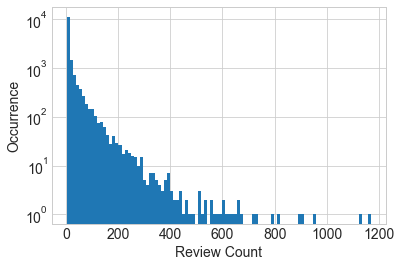

In [11]:
# レビュー件数のヒストグラムを描画
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

### 例2-8 平均評価を予測するためにYelpレビュー件数の対数変換を使う

In [13]:
import pandas as pd
import numpy as np
import json
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [15]:
# 例2-2で読み込んだYelpデータセットの
# データフレームbiz_dfを使用して、レビュー件数を対数変換する
# レビュー件数0を対数変換してマイナス無限大になるのを防ぐために
# 対数変換の前に生データに1を加算していることに注意
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)

In [16]:
biz_df.head(3)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,log_review_count
0,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",O_X3PGhk3Y5JWVi866qlJg,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",33.638573,-112.092329,Turf Paradise Race Course,[],True,29,4.0,AZ,business,1.477121
1,"{'Parking': {'garage': False, 'street': False,...",QbrM7wqtmoNncqjc6GtFaQ,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},33.648545,-112.234755,Sam's Club Members Only,[],True,3,3.5,AZ,business,0.602060
2,"{'Parking': {'garage': False, 'street': False,...",7lbvsGKzhjuX3oJtaXJvOg,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",33.383123,-111.964485,Forever 21,[],True,7,3.5,AZ,business,0.903090


In [17]:
# 各店舗の平均評価(stars)を予測するために線形回帰モデルを学習する
# 特徴量review_countを対数変換した場合としない場合とで
# 10分割クロスバリデーションによりR2スコアを比較する
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']], biz_df['stars'], cv=10)

In [18]:
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']], biz_df['stars'], cv=10)

In [24]:
print('R-squared score without log transform: %0.5f (+/- %0.5f)'
     % (scores_orig.mean(), scores_orig.std() * 2))
print('R-squared score with log transform: %0.5f (+/- %0.5f)'
     % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00179 (+/- 0.00417)
R-squared score with log transform: 0.00069 (+/- 0.00585)


### 例2-9 Online News Popularityデータセットの記事の人気を予測するために単語数を対数変換する

In [26]:
# Online News PopularityデータセットをUCIリポジトリからダウンロードし
# Pandasを使ってデータフレームとして読み込む
df = pd.read_csv('data/OnlineNewsPopularity/OnlineNewsPopularity.csv', delimiter=', ')

C:\Users\riode\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
df.head(3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500


In [28]:
# ニュース記事内に含まれる単語数 'n_tokens_content'に対数変換を施す
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

In [30]:
# 記事のシェア数を予測する2つの線形回帰モデルを学習する
# 1つはもとの特徴量であり、もう1つは対数変換をかけた特徴量を使う
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, df[['n_tokens_content']], df['shares'], cv=10)

In [33]:
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, df[['log_n_tokens_content']], df['shares'], cv=10)

In [34]:
print('R-squared score without log transform: %0.5f (+/- %0.5f)'
     % (scores_orig.mean(), scores_orig.std() * 2))
print('R-squared score with log transform: %0.5f (+/- %0.5f)'
     % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


### 例2-10 ニュース記事の人気予測問題における入出力間の相関の可視化

Text(0,0.5,'Number of Shares')

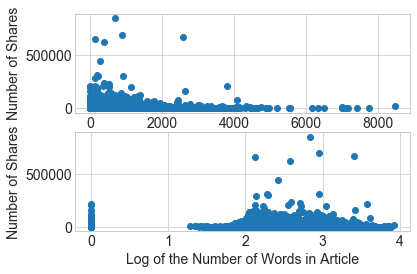

In [35]:
fig2, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(df['n_tokens_content'], df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2.scatter(df['log_n_tokens_content'], df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

### 例2-11 Yelp評価予測における入力と出力の相関の可視化

Text(0,0.5,'Average Star Rating')

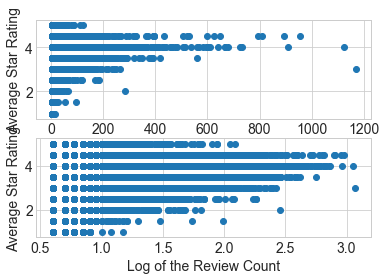

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)
ax1.se

ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)